In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('DSBDALExam DataSets/forestfires/forestfires.csv')

In [3]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [4]:
df.shape

(517, 13)

In [5]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [7]:
df.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [8]:
np.random.seed(42)
mask = np.random.rand(*df.shape) < 0.05
df[mask] = np.nan

In [9]:
df.isna().sum()

X        25
Y        29
month    18
day      21
FFMC     22
DMC      22
DC       28
ISI      25
temp     20
RH       24
wind     28
rain     25
area     36
dtype: int64

In [10]:
df.fillna(df.mode().iloc[0], inplace=True)

In [11]:
df.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [12]:
df.isna().sum().sum()

0

In [13]:
def classify_area(area):
    if area == 0:
        return 'Not Affected'
    elif area < 50:
        return 'Partially Affected'
    else:
        return 'Mostly Affected'

In [14]:
df['area_class'] = df['area'].apply(classify_area)

In [15]:
subsetNA = df[df['area_class'] == 'Not Affected']
subsetPA = df[df['area_class'] == 'Partially Affected']
subsetMA = df[df['area_class'] == 'Mostly Affected']

In [16]:
merged_data = pd.concat([subsetNA, subsetPA])

In [17]:
merged_data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_class
0,7.0,5.0,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,2.2,0.0,0.0,Not Affected
1,7.0,4.0,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0,Not Affected
2,7.0,4.0,oct,sun,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0,Not Affected
3,8.0,6.0,mar,sun,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0,Not Affected
4,8.0,6.0,mar,sun,89.3,51.3,745.3,9.6,11.4,99.0,1.8,0.0,0.0,Not Affected


In [18]:
sorted_values = df.sort_values(by=['temp', 'wind', 'area'])

In [19]:
sorted_values

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_class
280,4.0,6.0,dec,fri,84.7,26.7,352.6,4.1,2.2,59.0,4.9,0.0,9.27,Partially Affected
282,6.0,3.0,aug,sun,84.9,99.0,353.5,3.4,4.2,51.0,4.0,0.0,0.00,Not Affected
465,2.0,2.0,feb,sat,79.5,3.6,15.3,1.8,4.6,59.0,0.9,0.0,6.84,Partially Affected
279,4.0,4.0,dec,mon,85.4,25.4,349.7,2.6,4.6,21.0,2.2,0.0,9.77,Partially Affected
463,6.0,5.0,feb,tue,75.1,4.4,16.2,1.9,4.6,82.0,6.3,0.0,5.39,Partially Affected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,1.0,3.0,aug,fri,95.9,158.0,633.6,11.3,32.4,27.0,2.2,0.0,0.00,Not Affected
491,4.0,4.0,aug,thu,95.8,152.0,624.1,13.8,32.4,21.0,4.5,0.0,0.00,Not Affected
496,4.0,5.0,aug,mon,96.2,175.5,661.8,16.8,32.6,26.0,2.2,0.0,2.77,Partially Affected
484,2.0,5.0,aug,sun,94.9,130.3,587.1,14.1,33.1,25.0,4.0,0.0,26.43,Partially Affected


In [20]:
melted_data = pd.melt(df, id_vars=['month', 'day', 'X', 'Y'], value_vars=['temp', 'wind', 'rain', 'area'], var_name='Data', value_name='Value')

In [21]:
melted_data

,month,day,X,Y,Data,Value
0,mar,fri,7.0,5.0,temp,8.20
1,oct,tue,7.0,4.0,temp,18.00
2,oct,sun,7.0,4.0,temp,14.60
3,mar,sun,8.0,6.0,temp,8.30
4,mar,sun,8.0,6.0,temp,11.40
...,...,...,...,...,...,...
2063,aug,sun,4.0,3.0,area,6.44
2064,aug,sun,2.0,4.0,area,54.29
2065,aug,sun,7.0,4.0,area,11.16
2066,aug,sat,1.0,4.0,area,0.00


In [22]:
casted_data = melted_data.pivot_table(index=['month', 'day', 'X', 'Y'], columns='Data', values='Value')

In [23]:
casted_data

Data                    area  rain       temp      wind
month day X   Y                                        
apr   fri 4.0 4.0   0.000000   0.0  16.700000  3.100000
      mon 6.0 5.0   3.350000   0.0  10.900000  3.100000
      sat 6.0 4.0   0.000000   0.0   9.300000  4.500000
      sun 4.0 5.0   0.000000   0.0  13.400000  2.200000
          5.0 4.0   0.000000   0.0  17.600000  5.800000
...                      ...   ...        ...       ...
sep   wed 4.0 4.0  30.023333   0.0  19.666667  3.733333
              5.0   9.410000   0.0  24.300000  4.000000
          5.0 6.0   0.000000   0.0  25.900000  4.000000
          6.0 5.0   0.000000   0.0  25.350000  4.700000
          7.0 4.0  18.855000   0.0  12.950000  4.250000

[322 rows x 4 columns]

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

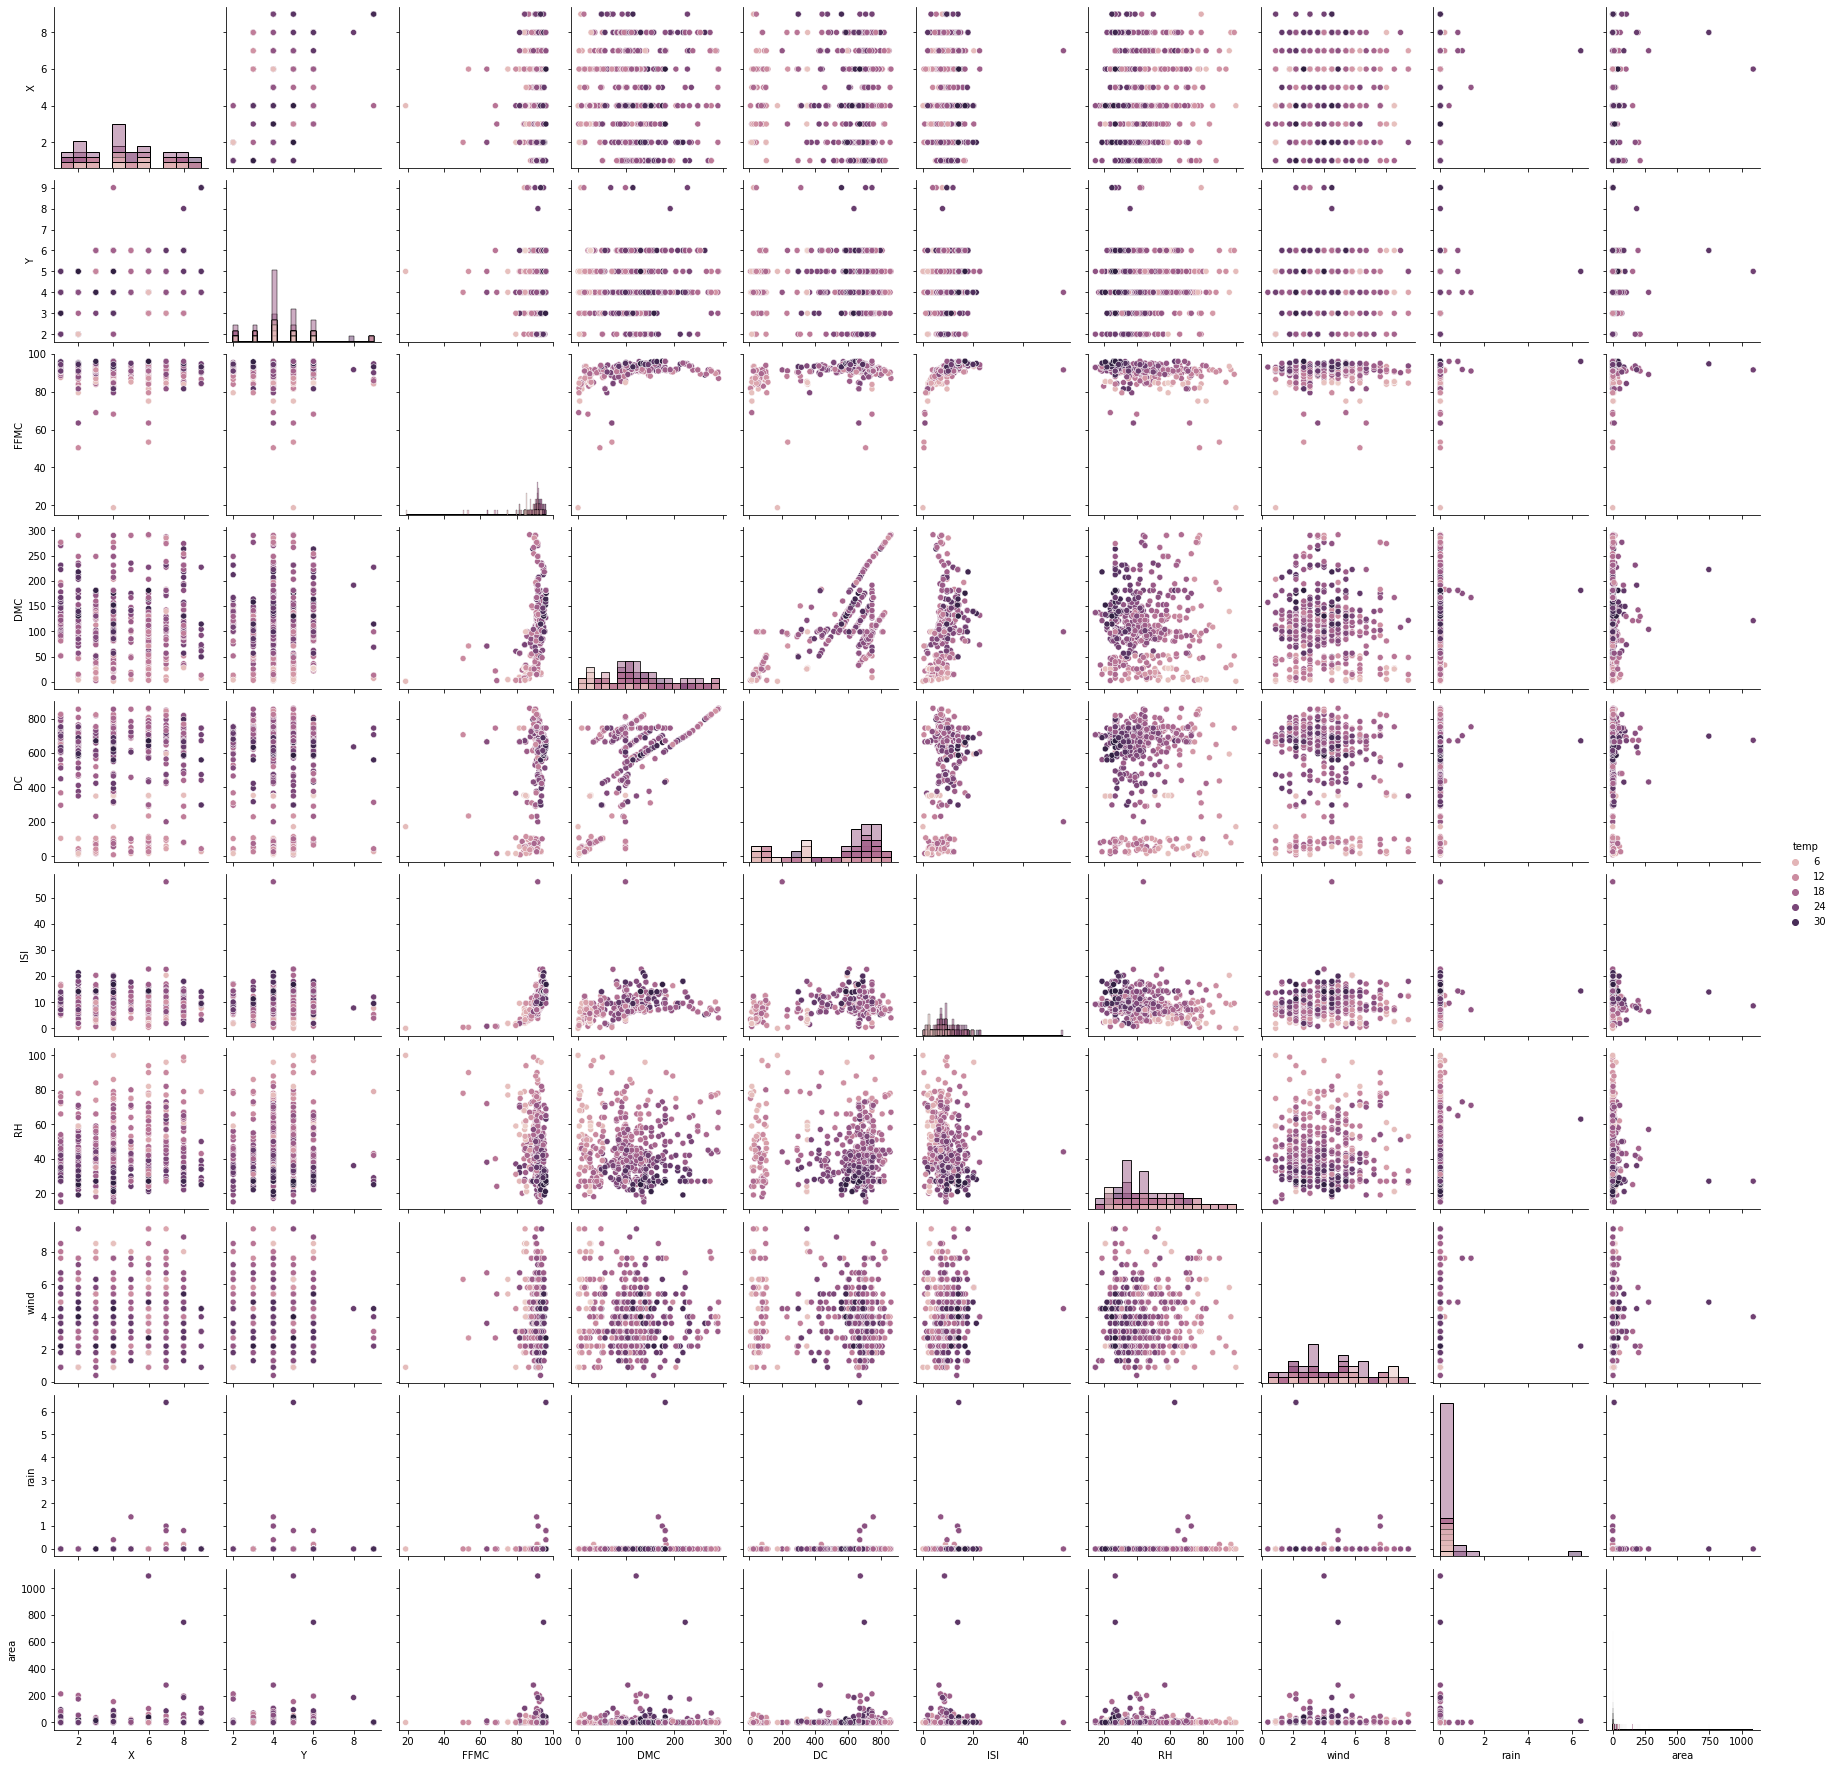

In [25]:
sns.pairplot(df, hue='temp', diag_kind='hist')
plt.show()

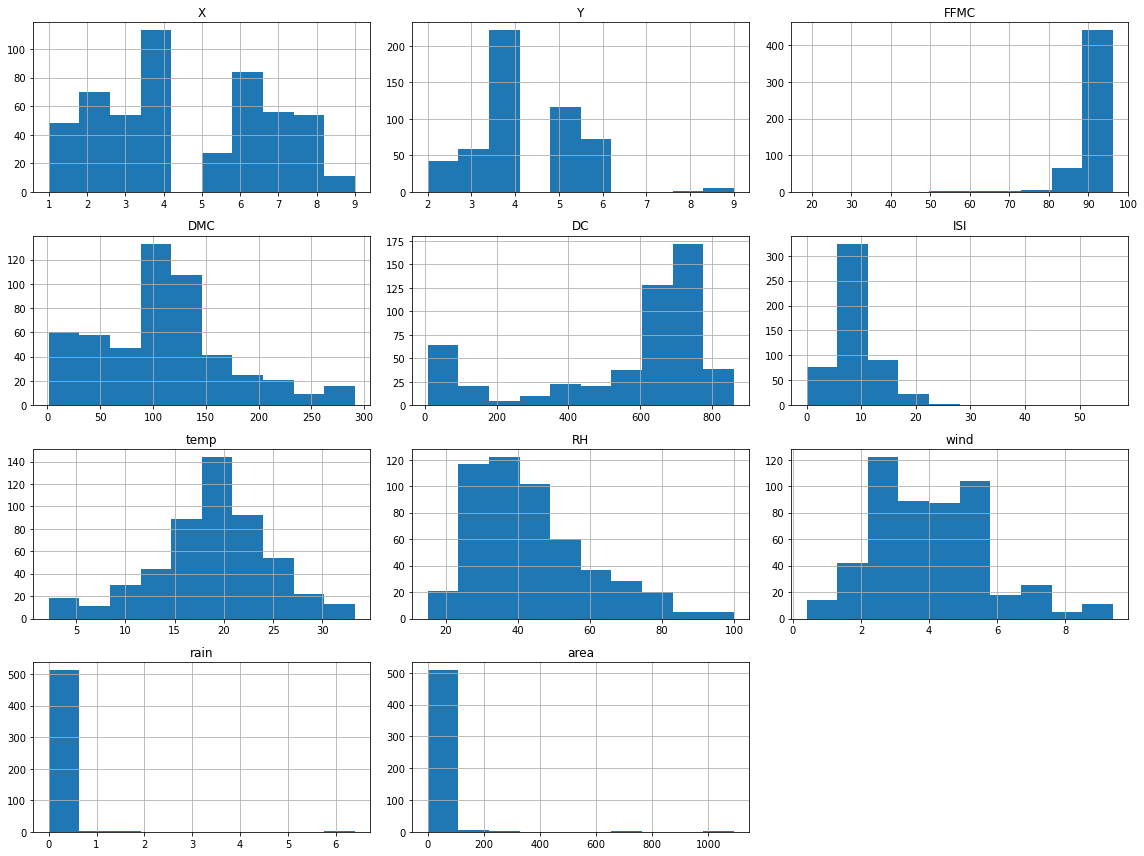

In [26]:
df.hist(figsize=(16, 12))
plt.tight_layout()
plt.show()

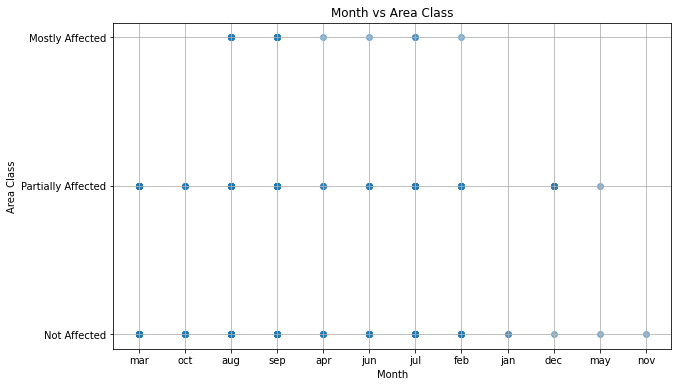

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(df['month'], df['area_class'], alpha=0.5)
plt.title('Month vs Area Class')
plt.xlabel('Month')
plt.ylabel('Area Class')
plt.grid(True)
plt.show()